In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('../deep_learning/rnn_results_test_multiple.csv')

In [3]:
df1.head()

,unique_id,ds,AutoRNN,AutoLSTM,AutoGRU,vintage_file
0,1.0,2018-04-01,0.009375,0.011282,0.011862,vintage_2018_05
1,1.0,2018-04-01,0.007260,0.009727,0.008475,vintage_2018_06
2,1.0,2018-04-01,0.006861,0.007733,0.009108,vintage_2018_07
3,1.0,2018-07-01,0.005682,0.005357,0.006554,vintage_2018_08
4,1.0,2018-07-01,0.009293,0.009357,0.009249,vintage_2018_09


In [4]:
def load_data(file_path):
    df = (pd.read_csv(file_path)
          .rename(columns={"year_quarter": "ds", "GDPC1": "y"})
          .assign(unique_id=np.ones(len(pd.read_csv(file_path))),
                  ds=lambda df: pd.to_datetime(df['ds'])))
    columns_order = ["unique_id", "ds", "y"] + \
        [col for col in df.columns if col not in ["unique_id", "ds", "y"]]
    
    # Shift 'y' column by one quarter
    # df['y'] = df['y'].shift(+3)

    return df[columns_order]

file_path = '../../data/FRED/blocked/vintage_2023_02.csv'

df2 = load_data(file_path)[['ds', 'y']]

In [5]:
df2

,ds,y
0,1959-04-01,0.022301
1,1959-07-01,0.000705
2,1959-10-01,0.002845
3,1960-01-01,0.022228
4,1960-04-01,-0.005405
...,...,...
251,2022-01-01,-0.004112
252,2022-04-01,-0.001447
253,2022-07-01,0.007980
254,2022-10-01,0.006602


In [6]:
# Convert 'ds' to datetime on both dataframes, if not already
df1['ds'] = pd.to_datetime(df1['ds'])
df2['ds'] = pd.to_datetime(df2['ds'])

In [7]:
# Merge the two dataframes
df1 = pd.merge(df1, df2, on='ds', how='left')

In [8]:
df1

,unique_id,ds,AutoRNN,AutoLSTM,AutoGRU,vintage_file,y
0,1.0,2018-04-01,0.009375,0.011282,0.011862,vintage_2018_05,0.006949
1,1.0,2018-04-01,0.007260,0.009727,0.008475,vintage_2018_06,0.006949
2,1.0,2018-04-01,0.006861,0.007733,0.009108,vintage_2018_07,0.006949
3,1.0,2018-07-01,0.005682,0.005357,0.006554,vintage_2018_08,0.007194
4,1.0,2018-07-01,0.009293,0.009357,0.009249,vintage_2018_09,0.007194
5,1.0,2018-07-01,0.008560,0.008789,0.009699,vintage_2018_10,0.007194
6,1.0,2018-10-01,0.006163,0.005967,0.004395,vintage_2018_11,0.001816
7,1.0,2018-10-01,0.003529,0.003176,0.003020,vintage_2018_12,0.001816
8,1.0,2018-10-01,0.005683,0.004356,0.005861,vintage_2019_01,0.001816
9,1.0,2019-01-01,0.007955,0.007058,0.008040,vintage_2019_02,0.005412


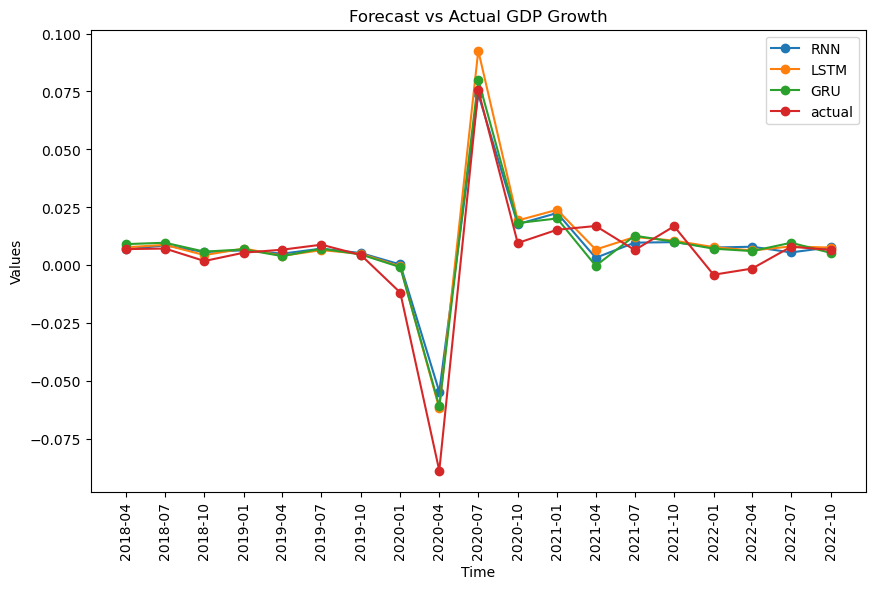

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Select every third row starting from the third row (index 2)
df_subset = df1[2::3]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'AutoRNN' against 'ds'
ax.plot(df_subset['ds'], df_subset['AutoRNN'], marker='o', label='RNN')
ax.plot(df_subset['ds'], df_subset['AutoLSTM'], marker='o', label='LSTM')
ax.plot(df_subset['ds'], df_subset['AutoGRU'], marker='o', label='GRU')

# Plot 'y' against 'ds'
ax.plot(df_subset['ds'], df_subset['y'], marker='o', label='actual')

# Format the x axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # adjust the interval as needed
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Make x-axis labels vertical
plt.xticks(rotation=90)

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Forecast vs Actual GDP Growth')
plt.legend()  # display labels in the top right corner
plt.show()

